# CNN MNIST

## Import libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

## Load MNIST Dataset and split it

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



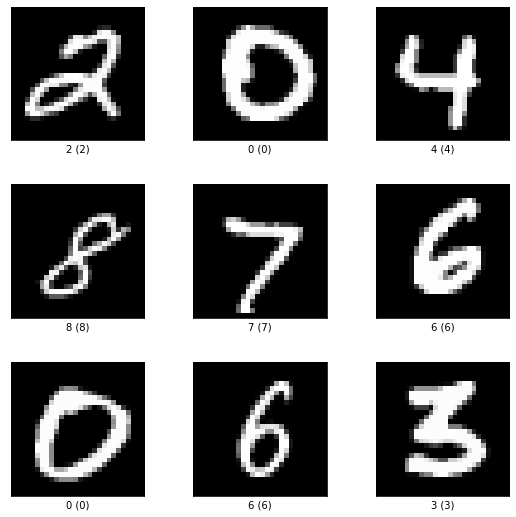

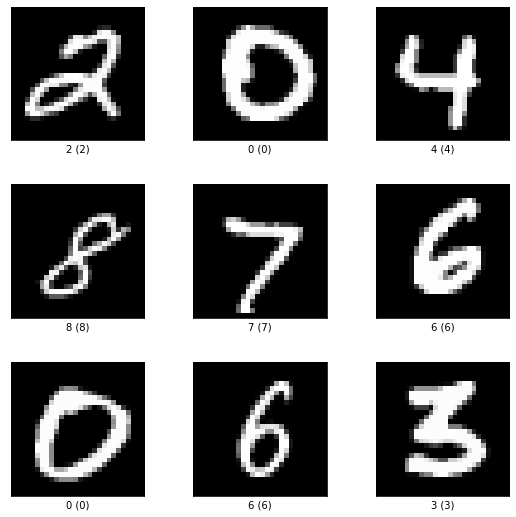

In [2]:
# Load full size of MNIST
MNIST_full, MNIST_info = tfds.load(
    'mnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(MNIST_info)

tfds.show_examples(MNIST_full, MNIST_info)

In [3]:
# Dataset size of MNIST
mnist_dataset_size = float( tf.data.experimental.cardinality(MNIST_full) )
print('Full dataset size of MNIST:', mnist_dataset_size)

Full dataset size of MNIST: 70000.0


In [4]:
# Split full dataset into train:test = 80:20
train_test_split = 0.8

mnist_train_size = round(mnist_dataset_size * train_test_split)
mnist_test_size = round(mnist_dataset_size - mnist_train_size)


MNIST_train = MNIST_full.take(mnist_train_size)
print('Size of Train_set:', mnist_train_size)

MNIST_test = MNIST_full.skip(mnist_train_size)
print('Size of Test_set:', mnist_test_size)

Size of Train_set: 56000
Size of Test_set: 14000


## Prepare x, y

In [5]:
x_train = []
x_test = []
y_train = []
y_test = []

for images, labels in MNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in MNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Normalize

In [6]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

### Reshape

In [7]:
x_train = np.reshape(x_train ,(56000, 28, 28, 1)).astype('float32')
x_test = np.reshape(x_test, (14000, 28, 28, 1)).astype('float32')

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Transform to one-hot encoding

In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Shape after one-hot encoding: ", y_train.shape)

Shape after one-hot encoding:  (56000, 10)


## CNN Model for MNIST

In [10]:
model = tf.keras.Sequential() 
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,  batch_size=128, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
438/438 - 52s - loss: 1.1623 - accuracy: 0.6055 - val_loss: 0.3566 - val_accuracy: 0.8943
Epoch 2/20
438/438 - 52s - loss: 0.4290 - accuracy: 0.8671 - val_loss: 0.2325 - val_accuracy: 0.9310
Epoch 3/20
438/438 - 52s - loss: 0.3197 - accuracy: 0.9021 - val_loss: 0.1756 - val_accuracy: 0.9472
Epoch 4/20
438/438 - 52s - loss: 0.2592 - accuracy: 0.9230 - val_loss: 0.1482 - val_accuracy: 0.9552
Epoch 5/20
438/438 - 52s - loss: 0.2207 - accuracy: 0.9337 - val_loss: 0.1243 - val_accuracy: 0.9623
Epoch 6/20
438/438 - 52s - loss: 0.1898 - accuracy: 0.9427 - val_loss: 0.1101 - val_accuracy: 0.9662
Epoch 7/20
438/438 - 52s - loss: 0.1740 - accuracy: 0.9471 - val_loss: 0.0989 - val_accuracy: 0.9711
Epoch 8/20
438/438 - 52s - loss: 0.1574 - accuracy: 0.9526 - val_loss: 0.0898 - val_accuracy: 0.9729
Epoch 9/20
438/438 - 52s - loss: 0.1487 - accuracy: 0.9555 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 10/20
438/438 - 52s - loss: 0.1385 - accuracy: 0.9583 - val_loss: 0.0800 - val_accura

## Plot  history

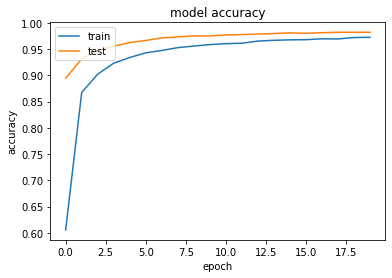

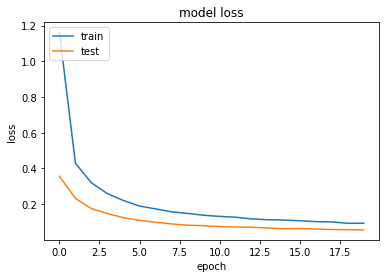

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN KMNIST

## Load KMNIST Dataset and split it

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteT58SRI/kmnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteT58SRI/kmnist-test.tfrecord


Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


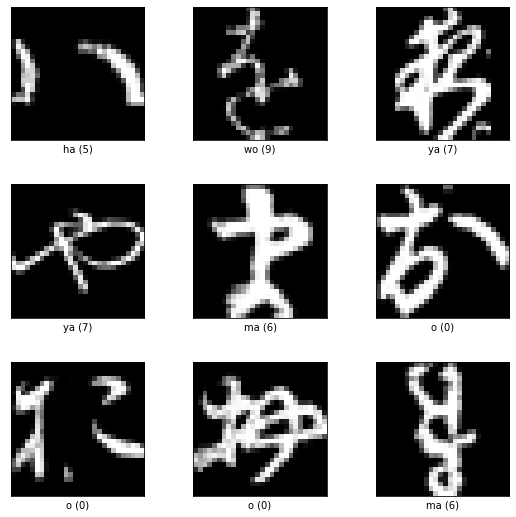

Full dataset size of KMNIST: 70000.0
Size of Train_set: 56000
Size of Test_set: 14000


In [13]:
# Load full size of MNIST
KMNIST_full, KMNIST_info = tfds.load(
    'kmnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
tfds.show_examples(KMNIST_full, KMNIST_info)


# Print dataset size of MNIST
kmnist_dataset_size = float( tf.data.experimental.cardinality(KMNIST_full) )
print('Full dataset size of KMNIST:', kmnist_dataset_size)

# Split full dataset into train:test = 80:20
train_test_split = 0.8

kmnist_train_size = round(kmnist_dataset_size * train_test_split)
kmnist_test_size = round(kmnist_dataset_size - kmnist_train_size)

KMNIST_train = KMNIST_full.take(kmnist_train_size)
print('Size of Train_set:', kmnist_train_size)

KMNIST_test = KMNIST_full.skip(kmnist_train_size)
print('Size of Test_set:', kmnist_test_size)

## Prepare x,y

In [14]:
x_train = []
x_test = []
y_train = []
y_test = []
for images, labels in KMNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in KMNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Normalize

In [15]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

### Reshape

In [16]:
x_train = np.reshape(x_train ,(56000, 28, 28, 1)).astype('float32')
x_test = np.reshape(x_test, (14000, 28, 28, 1)).astype('float32')

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Transform to one-hot encoding

In [17]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Shape after one-hot encoding: ", y_train.shape)

Shape after one-hot encoding:  (56000, 10)


## CNN Model for KMNIST

In [18]:
model = tf.keras.Sequential() 
model.add(Conv2D(filters=16 ,kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(filters=36 ,kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,  batch_size=128, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
438/438 - 54s - loss: 0.5563 - accuracy: 0.8220 - val_loss: 0.1433 - val_accuracy: 0.9577
Epoch 2/20
438/438 - 53s - loss: 0.2239 - accuracy: 0.9332 - val_loss: 0.0930 - val_accuracy: 0.9716
Epoch 3/20
438/438 - 53s - loss: 0.1653 - accuracy: 0.9502 - val_loss: 0.0772 - val_accuracy: 0.9777
Epoch 4/20
438/438 - 53s - loss: 0.1362 - accuracy: 0.9579 - val_loss: 0.0668 - val_accuracy: 0.9801
Epoch 5/20
438/438 - 53s - loss: 0.1107 - accuracy: 0.9657 - val_loss: 0.0588 - val_accuracy: 0.9822
Epoch 6/20
438/438 - 53s - loss: 0.0979 - accuracy: 0.9696 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 7/20
438/438 - 53s - loss: 0.0854 - accuracy: 0.9723 - val_loss: 0.0567 - val_accuracy: 0.9842
Epoch 8/20
438/438 - 53s - loss: 0.0765 - accuracy: 0.9763 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 9/20
438/438 - 53s - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 10/20
438/438 - 53s - loss: 0.0656 - accuracy: 0.9791 - val_loss: 0.0503 - val_accura

## Plot  history

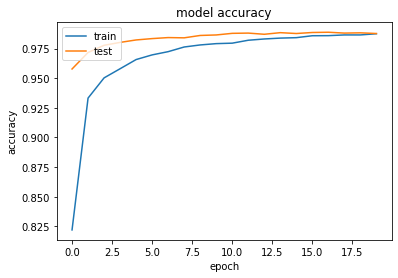

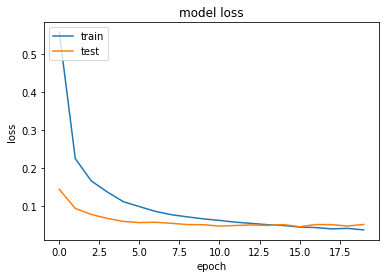

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()